# IMPORTING REQUIRED LIBRARIES

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas_profiling as pp
import sweetviz as sv
import time
import matplotlib.pyplot as plt
import warnings
import statistics

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

#Libarary to read the contents in the csv file

from pandas import read_csv

#All libraries for plotting

from matplotlib import *

#Libraries for feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Libraries for Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean

#Library for Standard Scaler

from sklearn.preprocessing import StandardScaler

#Library for Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

#Libraries for model building

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

#Libraries for comparision metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

#Library for Hyper-Parameter Tunning

from sklearn.model_selection import RandomizedSearchCV

# DATA UPLOADATION AND VERIFICATION

In [2]:
#Creating a dataframe using zomato bangalore dataset that is saved in jupyter

zomato_bangalore=pd.read_csv("zomato.csv",encoding ='latin-1')

In [3]:
#Verifing the dataset

zomato_bangalore.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#Checking the dimensions of the dataframe

zomato_bangalore.shape

(51717, 17)

In [5]:
#Displays information about the non-null values and the data type of each variable in the dataset

zomato_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# DATA CLEANSING AND FEATURE ENGINEERING

In [6]:
#Visualising the raw data using sweetviz

display=sv.analyze(zomato_bangalore)
display.show_html('Zomato EDA1.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Zomato EDA1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Removal of unwanted columns

In [7]:
#Removing variables that are not used for analysis
#URL is 100% unique and its of no use for analysis
#Phone number of the restaurant doesnot give any valuable information
#The project is on predicting the ratings of the restaurant not on the reviews of the customers

zomato_bangalore=zomato_bangalore.drop(['url','phone','address','reviews_list'],axis=1)

In [8]:
#Renaming columns for better understanding

zomato_bangalore=zomato_bangalore.rename(columns = { 'menu_item':'Menu_Item','name': 'Name','online_order':'Online_Order', 'book_table':'Book_Table', 'rate': 'Ratings','votes':'Votes', 'location': 'Location','rest_type':'Rest_Type', 'dish_liked':'Dish_Liked', 'cuisines': 'Cuisines', 'approx_cost(for two people)': 'Meal_Cost', 'listed_in(type)': 'Listed_In','listed_in(city)':'Listed_In(City)'},inplace=False)

## Removing duplicates

In [9]:
#Checking the count of duplicate observations

zomato_bangalore[zomato_bangalore.duplicated()].shape

(1832, 13)

In [10]:
#Removing duplicate observations

zomato_bangalore=zomato_bangalore.drop_duplicates()

## Pre-Processing of Variables

### Pre-Processing of Meal_Cost Variable

In [11]:
#Checking the uniquness of the Meal Cost for 2 person

zomato_bangalore.Meal_Cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
#Since the values of Meal_Cost contains comma, first it must be removed

zomato_bangalore['Meal_Cost']=zomato_bangalore['Meal_Cost'].astype(str).apply(lambda x: x.replace(',', ''))

#Now the values of Meal_Cost is completely in digits, it is converted to float type

zomato_bangalore['Meal_Cost']=zomato_bangalore['Meal_Cost'].astype(float)

### Pre-Processing of Ratings Variable

In [13]:
#Checking the unique values of Ratings variable

zomato_bangalore.Ratings.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#Printing the count of New restaurants and unrated restaurants

print('Number of restaurants with NEW rating:',zomato_bangalore[zomato_bangalore['Ratings'] == 'NEW'].shape[0])
print('Number of restaurants with nan rating:',zomato_bangalore[zomato_bangalore['Ratings'].isnull()].shape[0])
print('Number of restaurants with - rating:',zomato_bangalore[zomato_bangalore['Ratings'] == '-'].shape[0])

Number of restaurants with NEW rating: 2193
Number of restaurants with nan rating: 7759
Number of restaurants with - rating: 69


In [15]:
#Observations are taken by excluding NEW and UNRATED restaurants

zomato_bangalore=zomato_bangalore.loc[zomato_bangalore.Ratings !='NEW']
zomato_bangalore=zomato_bangalore.loc[zomato_bangalore.Ratings !='-'].reset_index(drop=True)

#Ratings is supposed to be in number so its better to remove the string content

strip_slash=lambda x:x.replace('/5', '') if type(x) == np.str else x

#Ratings variable is converted to float as it contains decimal values

zomato_bangalore.Ratings=zomato_bangalore.Ratings.apply(strip_slash).str.strip().astype('float')
zomato_bangalore['Ratings'].head() 

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Ratings, dtype: float64

## Handling Missing data

<AxesSubplot:>

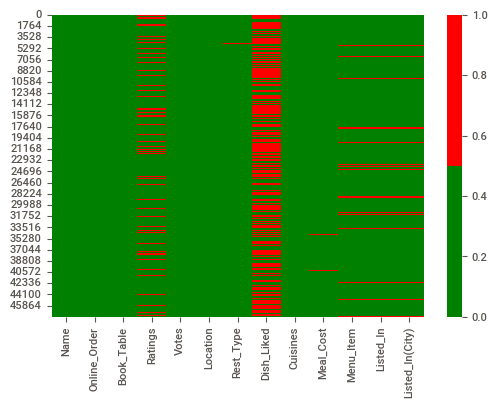

In [16]:
#Plot to represent missing values using seaborn
#Red indicates the missing data and green indicates the values
#Plot just shows the overview of missing observations

sns.heatmap(zomato_bangalore[zomato_bangalore.columns].isnull(),cmap=sns.color_palette(['Green','Red']))

In [17]:
#Calculating missing value percentage on each variable

zomato_bangalore.isnull().sum()/(len(zomato_bangalore))*100

Name                0.000000
Online_Order        0.000000
Book_Table          0.000000
Ratings            16.292548
Votes               0.000000
Location            0.044096
Rest_Type           0.464061
Dish_Liked         54.293094
Cuisines            0.094492
Meal_Cost           0.688743
Menu_Item           5.440648
Listed_In           5.440648
Listed_In(City)     5.440648
dtype: float64

In [18]:
#Dropping the column Dish_Lisked as it has more than 50% missing values
#This might effect the result if we impute the missing values for large percentage
#Moreover, Dish_Liked is the value that is given by the customers
#Since it is personal choice imputation cannot be done

zomato_bangalore=zomato_bangalore.drop(['Dish_Liked'],axis=1)

In [19]:
#Extracting the uniquness of Menu_Item
#Here it is seen that 34454 restaurants has not updated their menu items

pd.value_counts(zomato_bangalore['Menu_Item'])

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [20]:
#Since more than 70% of the observations doesnot contains menu items, it is removed rather than imputing

zomato_bangalore=zomato_bangalore.drop(['Menu_Item'],axis=1)

In [21]:
zomato_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47623 entries, 0 to 47622
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             47623 non-null  object 
 1   Online_Order     47623 non-null  object 
 2   Book_Table       47623 non-null  object 
 3   Ratings          39864 non-null  float64
 4   Votes            47623 non-null  int64  
 5   Location         47602 non-null  object 
 6   Rest_Type        47402 non-null  object 
 7   Cuisines         47578 non-null  object 
 8   Meal_Cost        47295 non-null  float64
 9   Listed_In        45032 non-null  object 
 10  Listed_In(City)  45032 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.0+ MB


In [22]:
#Only few variables contains null values
#Here we check the null value present in each cell

zomato_bangalore[zomato_bangalore.isnull().any(axis=1)]

,Name,Online_Order,Book_Table,Ratings,Votes,Location,Rest_Type,Cuisines,Meal_Cost,Listed_In,Listed_In(City)
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,NaN,NaN
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"North Indian, Fast Food, Chinese, Burger",500.0,NaN,NaN
34,Faasos,Yes,No,4.2,415,Banashankari,Quick Bites,"North Indian, Biryani, Fast Food",500.0,NaN,NaN
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"North Indian, Mughlai, South Indian, Chinese",750.0,NaN,NaN
44,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
47579,BAR BAR,No,Yes,4.1,1003,Whitefield,"Bar, Casual Dining","Continental, North Indian, Italian",1500.0,NaN,NaN
47592,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900.0,Drinks & nightlife,Whitefield
47616,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900.0,Pubs and bars,Whitefield
47619,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield


In [23]:
#Dropping null values

zomato_bangalore=zomato_bangalore.dropna()

In [24]:
#Checking duplicates on cleaned dataframe that is used for analysis

zomato_bangalore[zomato_bangalore.duplicated()].shape

(11, 11)

In [25]:
#Drop duplicates from cleaned dataframe that is used for analysis

zomato_bangalore=zomato_bangalore.drop_duplicates()

# EXPLORATORY DATA ANALYSIS (EDA)

## Statistical Analysis on Numerical Variables

In [26]:
#Statistical information of numeric variables

zomato_bangalore.describe()

,Ratings,Votes,Meal_Cost
count,36905.000000,36905.000000,36905.000000
mean,3.661669,231.721555,563.652784
std,0.411871,542.757876,437.756118
min,2.000000,0.000000,40.000000
25%,3.400000,18.000000,300.000000
50%,3.700000,58.000000,450.000000
75%,4.000000,212.000000,700.000000
max,4.900000,16345.000000,6000.000000


In [27]:
#Creating function to display box plot

def box(dataframe,columns):
    dataframe.boxplot(column=[columns])
    plt.grid(False)
    plt.show()

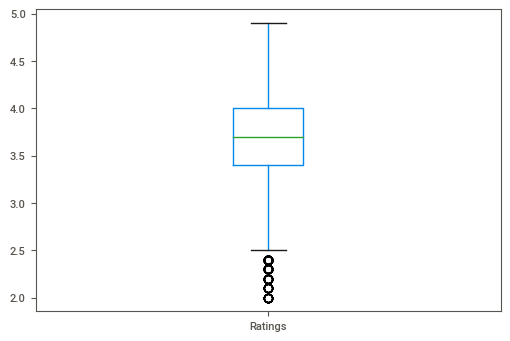

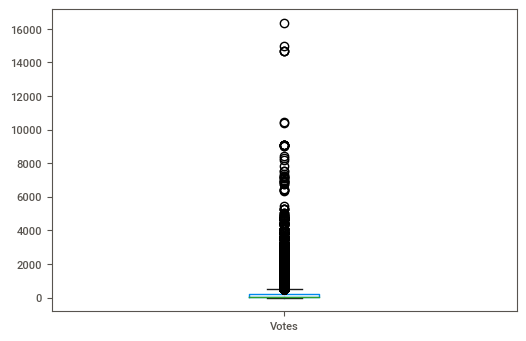

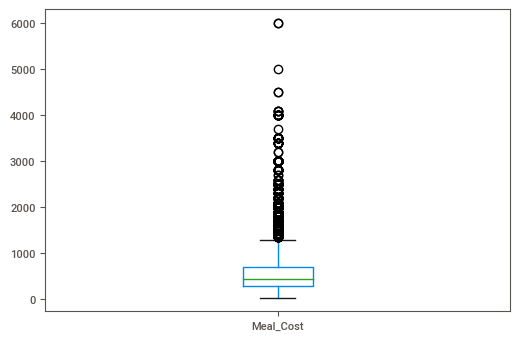

In [28]:
#Box plot on all numerical variables

box(zomato_bangalore,'Ratings')
box(zomato_bangalore,'Votes')
box(zomato_bangalore,'Meal_Cost')

In [29]:
#Checking Skewness value and Kurtosis value

zomato_bangalore.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Ratings,-0.383214,-0.028552
Votes,8.365102,132.262134
Meal_Cost,2.827567,12.601943


## Transformation of variables

<AxesSubplot:xlabel='Votes', ylabel='Density'>

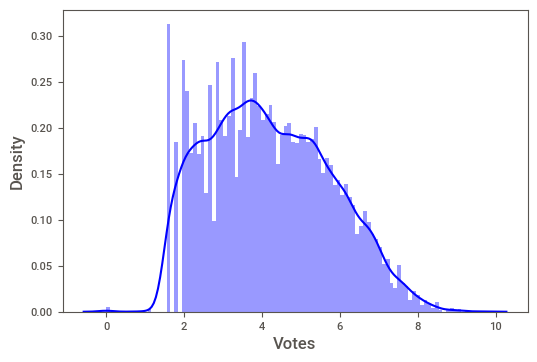

In [30]:
#Since the skewness value of Votes is more than 1, it needs to be transformed
#Log is used for transformation
#Since Votes contains zero value an Addition 1 value is added

zomato_bangalore['Votes']=np.log(zomato_bangalore.Votes +1)

#Now the Votes value looks normally distributed after transformation

sns.distplot(zomato_bangalore['Votes'],color='blue',bins=100)

<AxesSubplot:xlabel='Meal_Cost', ylabel='Density'>

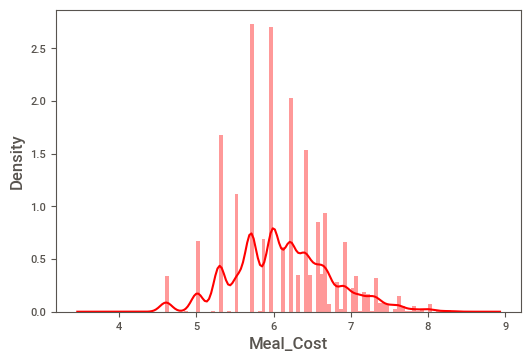

In [31]:
#Since the skewness value of Meal_Cost is more than 1, it needs to be transformed
#Log is used for transformation

zomato_bangalore['Meal_Cost']=np.log(zomato_bangalore.Meal_Cost)

#Now the Meal_Cost value looks normally distributed after transformation

sns.distplot(zomato_bangalore['Meal_Cost'],color='red',bins=100)

## Removing outliers

In [32]:
#Function to calculate quartiles and inter quartile range(IQR)

def outliers(dataframe,columns):
    quartile1=dataframe[columns].quantile(0.25)
    quartile3=dataframe[columns].quantile(0.75)
    inter_quartile_range=quartile3-quartile1
    
    lower_outliers=quartile1 - 1.5*inter_quartile_range
    upper_outliers=quartile3+1.5*inter_quartile_range
    
    ls=dataframe.index[(dataframe[columns]<lower_outliers)|(dataframe[columns]>upper_outliers)]
    
    return ls

In [33]:
#Saves outliers index value

ind=[]
for feature in ['Meal_Cost','Ratings','Votes']:
    ind.extend(outliers(zomato_bangalore,feature))
ind

[4470,
 4507,
 4583,
 4607,
 4609,
 4613,
 4615,
 4620,
 4631,
 4673,
 4711,
 4887,
 5619,
 5626,
 5628,
 5633,
 5636,
 5655,
 5662,
 5666,
 5668,
 5670,
 5676,
 5697,
 5701,
 5704,
 5709,
 5713,
 5724,
 5727,
 5730,
 5741,
 5745,
 5755,
 5779,
 5800,
 5804,
 5805,
 5835,
 5874,
 5887,
 6085,
 6091,
 6101,
 6129,
 6135,
 6149,
 6150,
 6159,
 6161,
 6175,
 6209,
 6216,
 6227,
 6245,
 6258,
 7311,
 7324,
 7400,
 8609,
 9856,
 10659,
 10661,
 10664,
 10665,
 10670,
 10688,
 10699,
 10725,
 10760,
 11300,
 11584,
 11590,
 11594,
 11599,
 11600,
 11605,
 11611,
 11614,
 11629,
 11631,
 11634,
 11637,
 11654,
 11656,
 11657,
 11663,
 11667,
 11680,
 11681,
 11684,
 11688,
 11693,
 11695,
 11705,
 11734,
 11765,
 11769,
 11771,
 11777,
 11793,
 11804,
 11846,
 11866,
 12051,
 12054,
 12059,
 12082,
 12100,
 12115,
 12195,
 12196,
 12197,
 12201,
 12208,
 12214,
 12219,
 12228,
 12241,
 12243,
 12255,
 12275,
 12277,
 12286,
 12303,
 12311,
 12913,
 12943,
 12967,
 13363,
 13398,
 13421,
 1360

In [34]:
#Function to remove outliers with the help of index value of the observations

def remove(dataframe,ls):
    ls=sorted(set(ls))
    dataframe=dataframe.drop(ls)
    return dataframe

In [35]:
#Temporary dataframe that saves observations after removing outliers

zomato_nooutliers=remove(zomato_bangalore,ind)

In [36]:
zomato_nooutliers.describe()

,Ratings,Votes,Meal_Cost
count,36389.000000,36389.000000,36389.000000
mean,3.661579,4.186998,6.100917
std,0.402118,1.565673,0.611693
min,2.500000,0.000000,4.605170
25%,3.400000,2.944439,5.703782
50%,3.700000,4.043051,5.991465
75%,3.900000,5.337538,6.476972
max,4.900000,8.968906,7.783224


In [37]:
zomato_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36389 entries, 0 to 47622
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             36389 non-null  object 
 1   Online_Order     36389 non-null  object 
 2   Book_Table       36389 non-null  object 
 3   Ratings          36389 non-null  float64
 4   Votes            36389 non-null  float64
 5   Location         36389 non-null  object 
 6   Rest_Type        36389 non-null  object 
 7   Cuisines         36389 non-null  object 
 8   Meal_Cost        36389 non-null  float64
 9   Listed_In        36389 non-null  object 
 10  Listed_In(City)  36389 non-null  object 
dtypes: float64(3), object(8)
memory usage: 3.3+ MB


In [38]:
zomato_bangalore = zomato_nooutliers.copy()

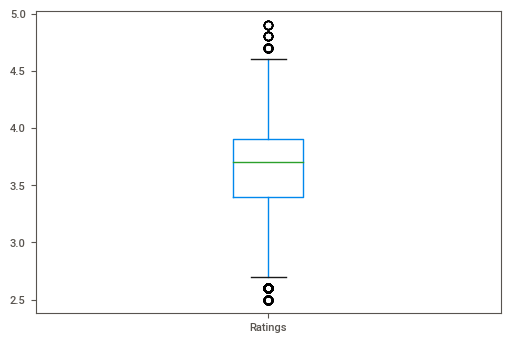

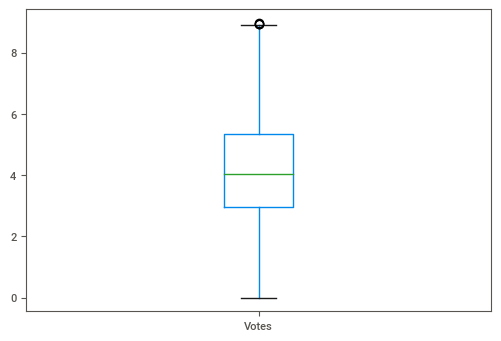

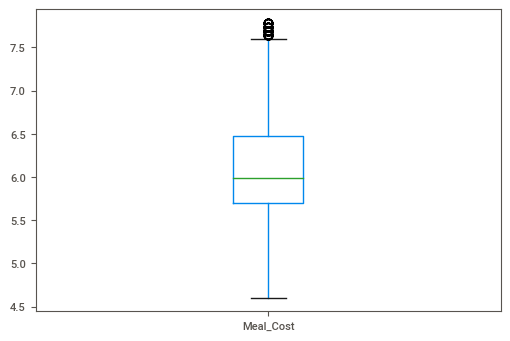

In [39]:
#Box plot on all numerical variables after transformation and outliers removal

box(zomato_bangalore,'Ratings')
box(zomato_bangalore,'Votes')
box(zomato_bangalore,'Meal_Cost')

## Visualisation

Text(0.5, 1.0, 'RATINGS OF THE RESTAURANT')

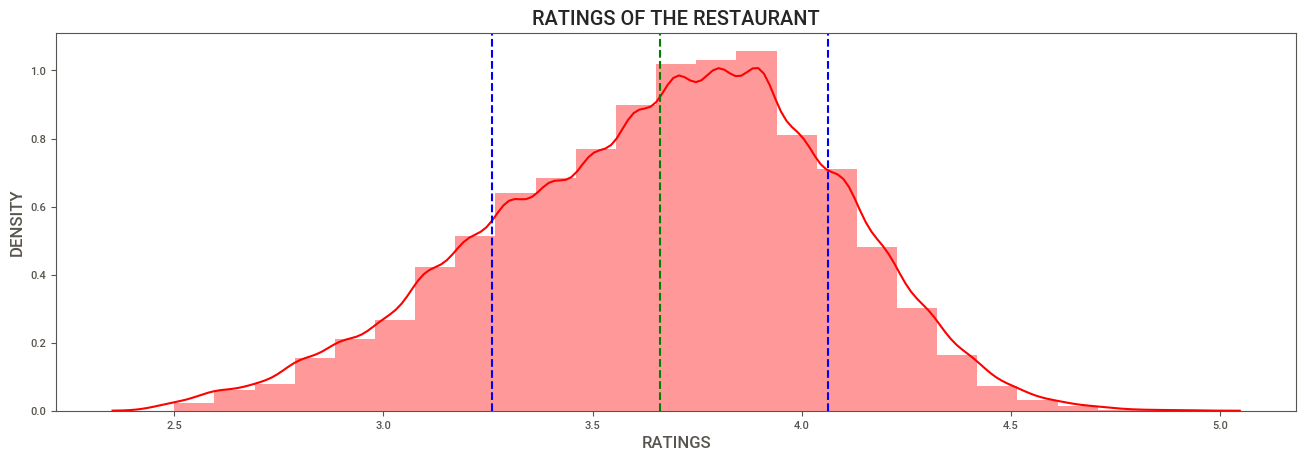

In [40]:
#Plotting the Ratings of the restaurant on a density graph with mean and standard deviation indicated

#Figuresize

plt.rcParams['figure.figsize']=(16,5)
plt.plot()
sns.distplot(zomato_bangalore['Ratings'], color='red',bins=25)

#Mean and Standard Deviation is calculated to draw line

mean=statistics.mean(zomato_bangalore['Ratings'])
sd=statistics.stdev(zomato_bangalore['Ratings'])
plt.axvline(mean,color='green',linestyle='dashed')
plt.axvline(mean+sd,color='blue',linestyle='dashed')
plt.axvline(mean-sd,color='blue',linestyle='dashed')
plt.ylabel('DENSITY',fontweight='bold')
plt.xlabel('RATINGS',fontweight='bold')
plt.title('RATINGS OF THE RESTAURANT',fontweight='bold')

Text(0.5, 1.0, 'MEAL COST OF THE RESTAURANT FOR TWO PEOPLE')

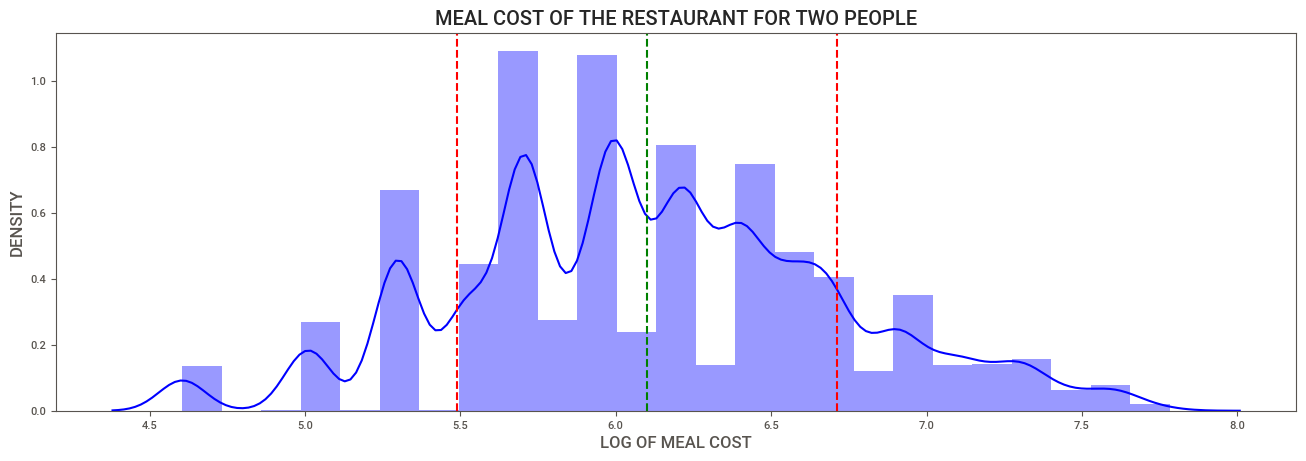

In [41]:
#Plotting the Ratings of the restaurant on a density graph with mean and standard deviation indicated

plt.rcParams['figure.figsize']=(16,5)
plt.plot()
sns.distplot(zomato_bangalore['Meal_Cost'], color='blue',bins=25)
mean=statistics.mean(zomato_bangalore['Meal_Cost'])
sd=statistics.stdev(zomato_bangalore['Meal_Cost'])
plt.axvline(mean,color='green',linestyle='dashed')
plt.axvline(mean+sd,color='red',linestyle='dashed')
plt.axvline(mean-sd,color='red',linestyle='dashed')
plt.ylabel('DENSITY',fontweight='bold')
plt.xlabel('LOG OF MEAL COST',fontweight='bold')
plt.title('MEAL COST OF THE RESTAURANT FOR TWO PEOPLE',fontweight='bold')

Text(0.5, 1.0, 'VOTES OF THE RESTAURANT')

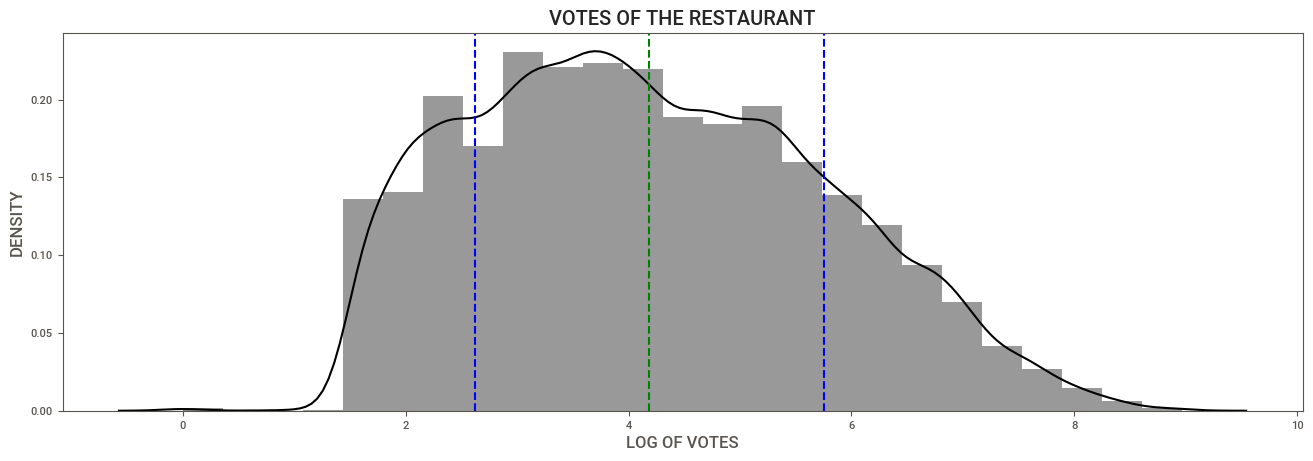

In [42]:
#Plotting the Ratings of the restaurant on a density graph with mean and standard deviation indicated

plt.rcParams['figure.figsize']=(16,5)
plt.plot()
sns.distplot(zomato_bangalore['Votes'], color='black',bins=25)
mean=statistics.mean(zomato_bangalore['Votes'])
sd=statistics.stdev(zomato_bangalore['Votes'])
plt.axvline(mean,color='green',linestyle='dashed')
plt.axvline(mean+sd,color='blue',linestyle='dashed')
plt.axvline(mean-sd,color='blue',linestyle='dashed')
plt.ylabel('DENSITY',fontweight='bold')
plt.xlabel('LOG OF VOTES',fontweight='bold')
plt.title('VOTES OF THE RESTAURANT',fontweight='bold')

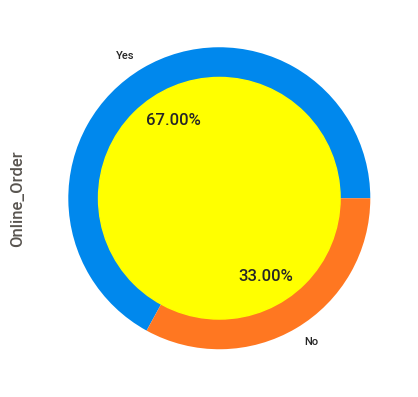

In [43]:
#Donut plot that indicates the percentage of Online Orders facility available in Bangalore Restaurants

zomato_bangalore.Online_Order.value_counts().plot(kind='pie', autopct='%1.2f%%')
circle=plt.Circle(xy=(0,0),radius=0.8,color='yellow')
plot=plt.gcf()
plot.gca().add_artist(circle)

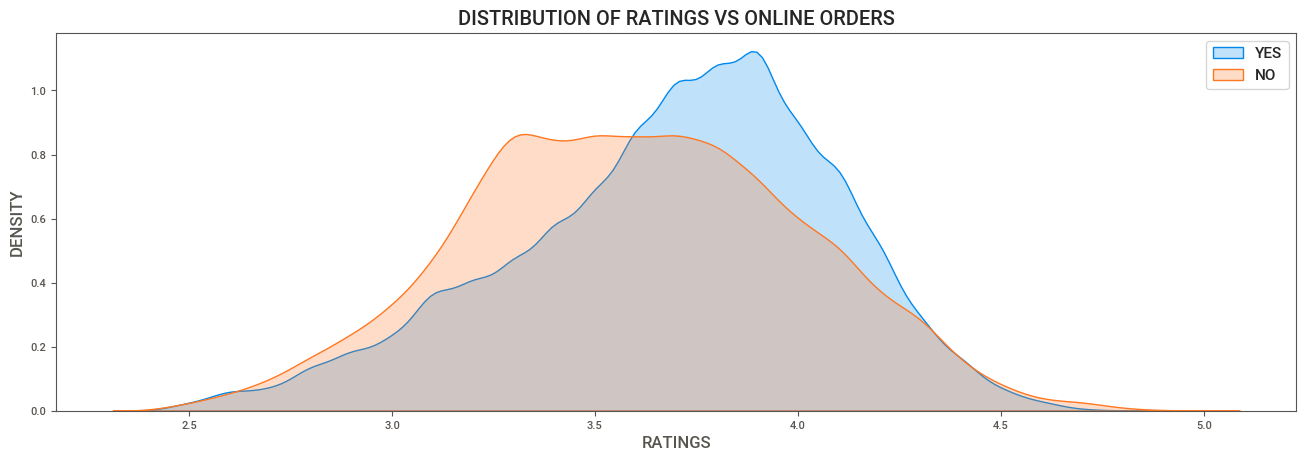

In [44]:
#Comparision of the distribution of Online Orders on Ratings of the Restaurant using Density Plot

sns.kdeplot(zomato_bangalore.loc[zomato_bangalore['Online_Order']=='Yes','Ratings'], label='YES',shade=True)
sns.kdeplot(zomato_bangalore.loc[zomato_bangalore['Online_Order']=='No','Ratings'], label='NO',shade=True)
plt.xlabel('RATINGS',fontweight='bold')
plt.ylabel('DENSITY',fontweight='bold')
plt.title('DISTRIBUTION OF RATINGS VS ONLINE ORDERS',fontweight='bold')
plt.legend()

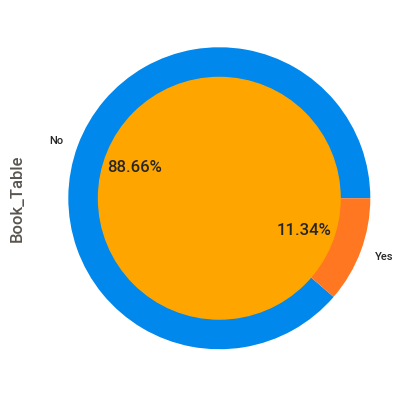

In [45]:
#Donut plot that indicates the percentage of Table Booking facility available in Bangalore Restaurants

zomato_bangalore.Book_Table.value_counts().plot(kind='pie', autopct='%1.2f%%')
circle2=plt.Circle(xy=(0,0),radius=0.8,color='orange')
plot2=plt.gcf()
plot2.gca().add_artist(circle2)

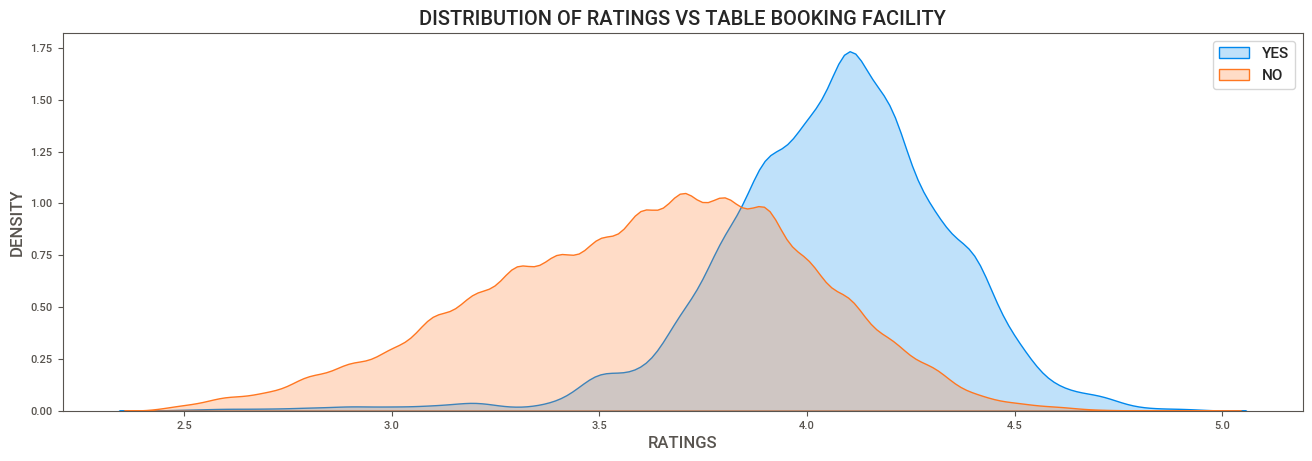

In [46]:
#Comparision of the distribution of Table Booking on Ratings of the Restaurant using Density Plot

sns.kdeplot(zomato_bangalore.loc[zomato_bangalore['Book_Table']=='Yes','Ratings'], label='YES',shade=True)
sns.kdeplot(zomato_bangalore.loc[zomato_bangalore['Book_Table']=='No','Ratings'], label='NO',shade=True)
plt.xlabel('RATINGS',fontweight='bold')
plt.ylabel('DENSITY',fontweight='bold') 
plt.title('DISTRIBUTION OF RATINGS VS TABLE BOOKING FACILITY',fontweight='bold')
plt.legend()

Text(0.5, 0, 'COUNT OF EACH BRANCH')

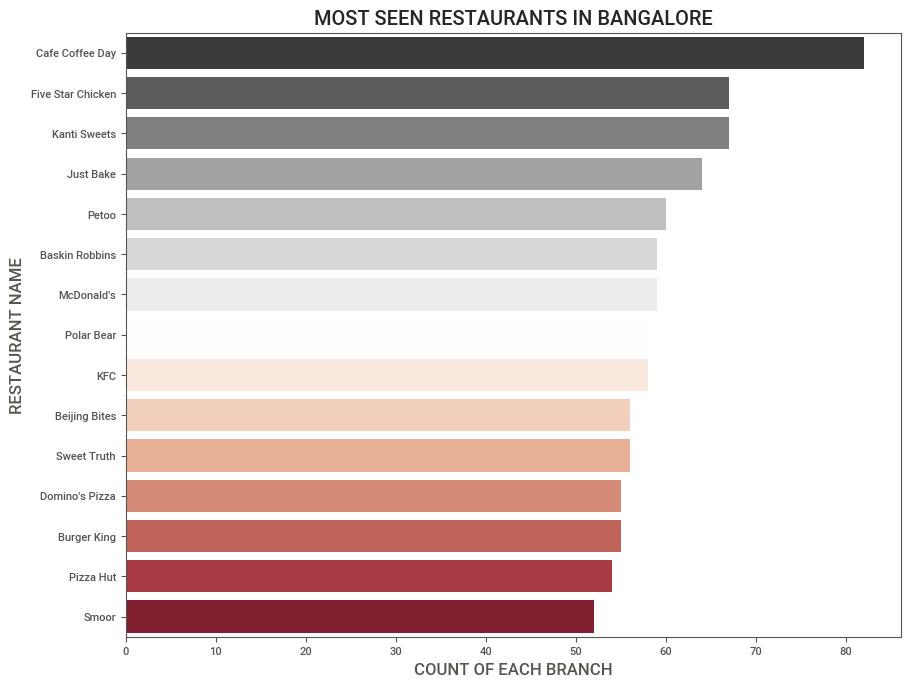

In [47]:
#Top 15 most seen restaurants in Bangalore

plt.figure(figsize=(10,8))
most_seen=zomato_bangalore['Name'].value_counts()[0:15]
sns.barplot(x=most_seen,y=most_seen.index,palette='RdGy_r')
plt.title('MOST SEEN RESTAURANTS IN BANGALORE',fontweight='bold')
plt.ylabel('RESTAURANT NAME',fontweight='bold')
plt.xlabel('COUNT OF EACH BRANCH',fontweight='bold')

Text(0.5, 0, 'AVERAGE RATINGS')

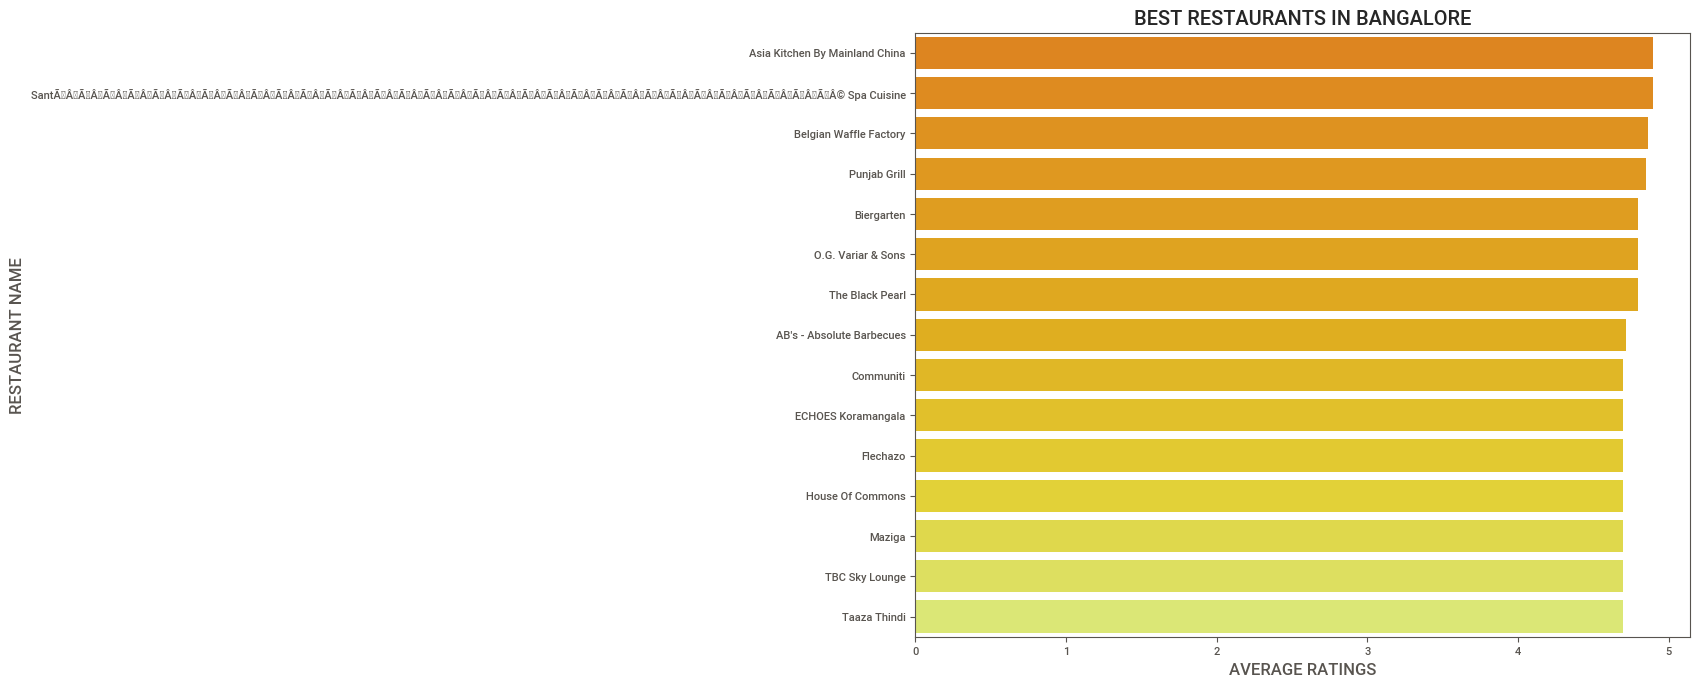

In [48]:
#Best restaurants in Bangalore 

plt.figure(figsize=(10,8))
best_restaurants=zomato_bangalore.groupby('Name')['Ratings'].mean().nlargest(15)
sns.barplot(x=best_restaurants,y=best_restaurants.index,palette='Wistia_r')
plt.title('BEST RESTAURANTS IN BANGALORE',fontweight='bold')
plt.ylabel('RESTAURANT NAME',fontweight='bold')
plt.xlabel('AVERAGE RATINGS',fontweight='bold') 

Text(0.5, 0, 'AVERAGE RATINGS OF TYPE OF RESTAURANT')

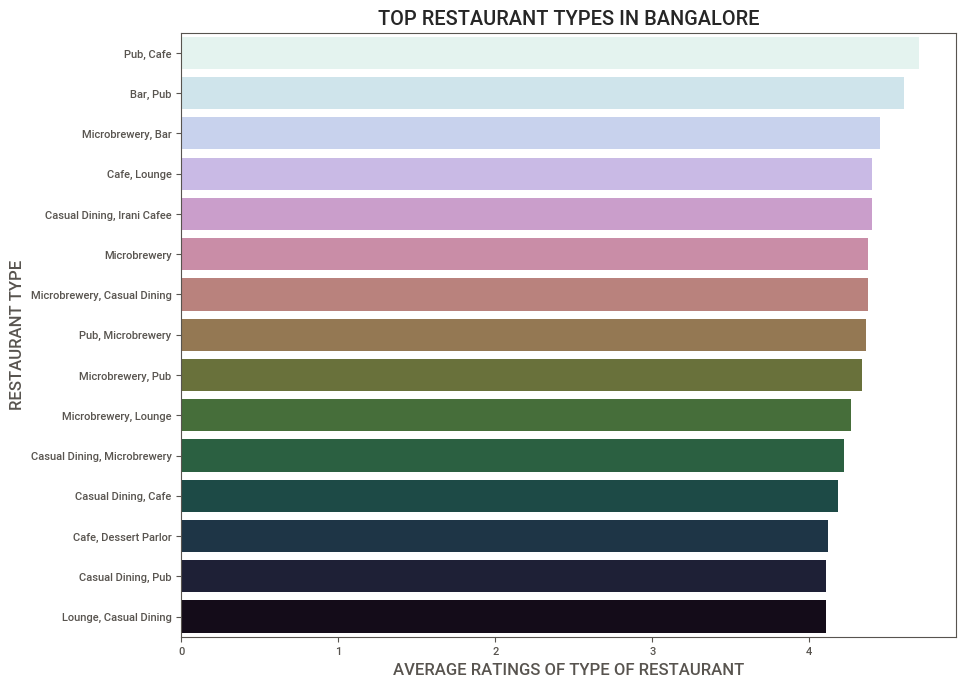

In [49]:
#Top Restaurant types in Bangalore

plt.figure(figsize=(10,8))
top_rest_type=zomato_bangalore.groupby('Rest_Type')['Ratings'].mean().nlargest(15)
sns.barplot(x=top_rest_type,y=top_rest_type.index,palette='cubehelix_r')
plt.title('TOP RESTAURANT TYPES IN BANGALORE',fontweight='bold')
plt.ylabel('RESTAURANT TYPE',fontweight='bold')
plt.xlabel('AVERAGE RATINGS OF TYPE OF RESTAURANT',fontweight='bold') 

Text(0.5, 0, 'AVERAGE RATING OF RESTAURANTS IN THAT AREA')

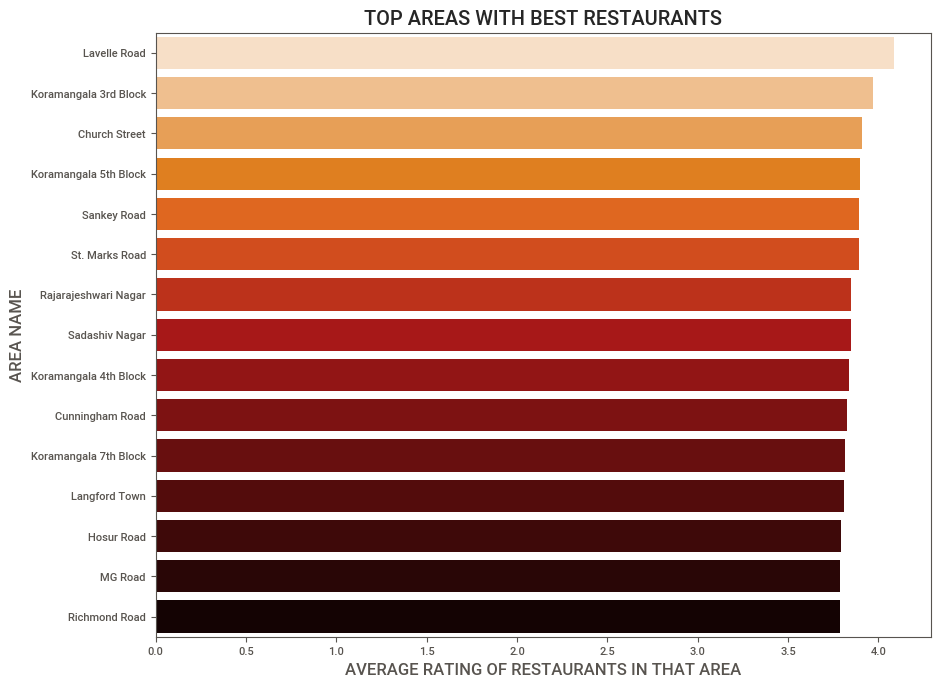

In [50]:
#Top areas with best Restaurants

plt.figure(figsize=(10,8))
top_area=zomato_bangalore.groupby('Location')['Ratings'].mean().nlargest(15)
sns.barplot(x=top_area,y=top_area.index,palette='gist_heat_r')
plt.title("TOP AREAS WITH BEST RESTAURANTS",fontweight='bold')
plt.ylabel('AREA NAME',fontweight='bold')
plt.xlabel("AVERAGE RATING OF RESTAURANTS IN THAT AREA",fontweight='bold') 

Text(0.5, 0, 'LOG OF AVERAGE PRICE OF A MEAL IN THAT AREA')

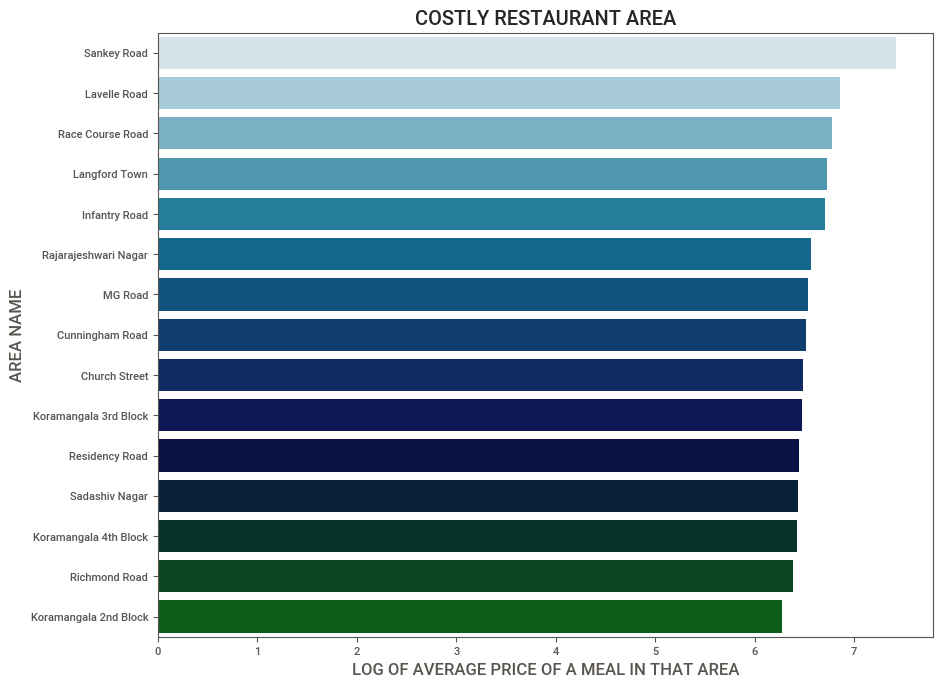

In [51]:
#Costliest Restaurant Area

plt.figure(figsize=(10,8))
costly_area=zomato_bangalore.groupby('Location')['Meal_Cost'].mean().nlargest(15)
sns.barplot(x=costly_area,y=costly_area.index,palette='ocean_r')
plt.title('COSTLY RESTAURANT AREA',fontweight='bold')
plt.ylabel('AREA NAME',fontweight='bold')
plt.xlabel('LOG OF AVERAGE PRICE OF A MEAL IN THAT AREA',fontweight='bold') 

Text(0.5, 0, 'AVERAGE RATING OF CUISINES')

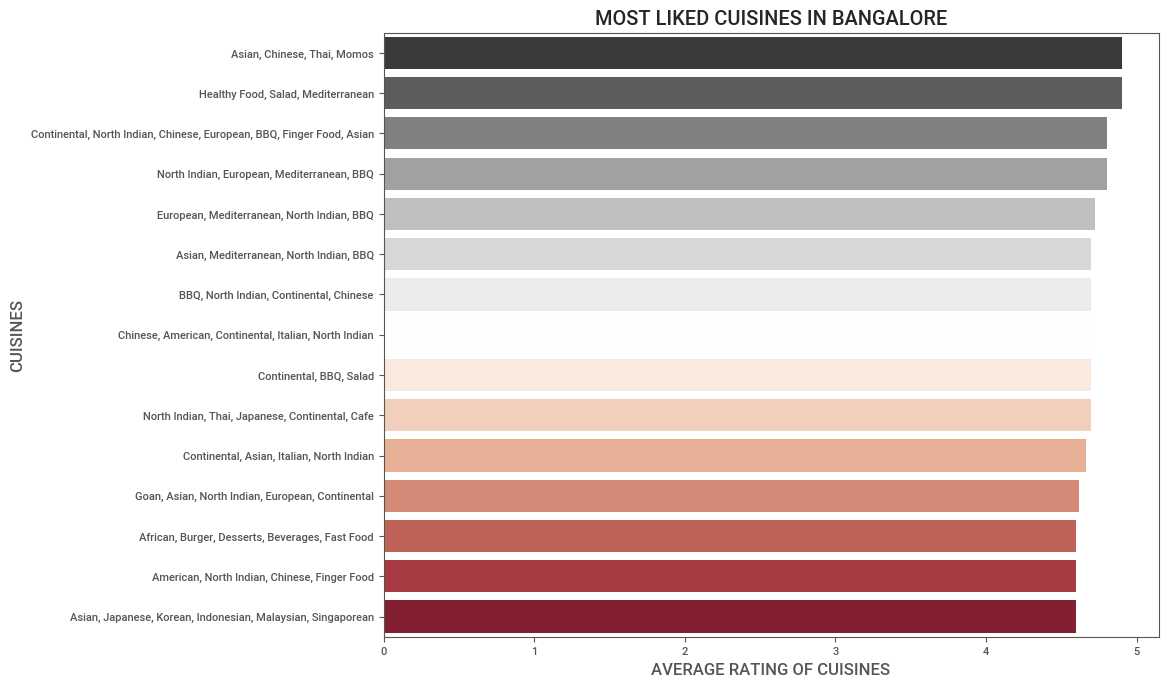

In [52]:
#Most liked Cuisines in Bangalore

plt.figure(figsize=(10,8))
liked_cuisines=zomato_bangalore.groupby('Cuisines')['Ratings'].mean().nlargest(15)
sns.barplot(x=liked_cuisines,y=liked_cuisines.index,palette='RdGy_r')
plt.title('MOST LIKED CUISINES IN BANGALORE',fontweight='bold')
plt.ylabel('CUISINES',fontweight='bold')
plt.xlabel('AVERAGE RATING OF CUISINES',fontweight='bold') 

Text(0.5, 0, 'AVERAGE RATING OF EACH SERVICE')

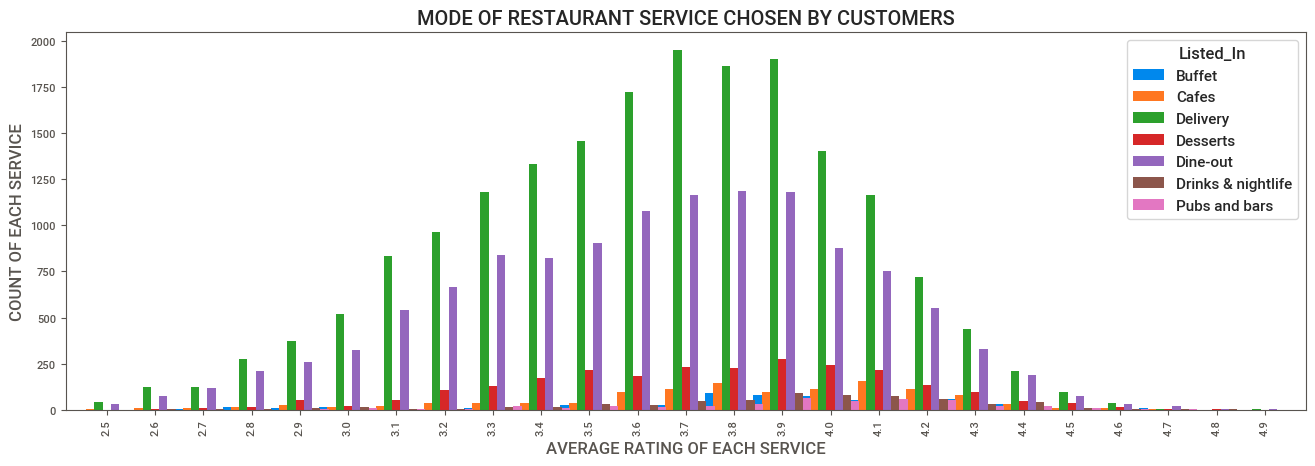

In [53]:
#Mode of Restaurant Service chosen by Customers

listed=pd.crosstab(zomato_bangalore.Ratings,zomato_bangalore.Listed_In)
listed.plot(kind='bar',width=1.2)
plt.title('MODE OF RESTAURANT SERVICE CHOSEN BY CUSTOMERS',fontweight='bold')
plt.ylabel('COUNT OF EACH SERVICE',fontweight='bold')
plt.xlabel('AVERAGE RATING OF EACH SERVICE',fontweight='bold') 

In [54]:
zomato_bangalore = zomato_bangalore.drop(['Name'],axis=1)

# LABEL ENCODING

In [55]:
#Function for label encoding

def labelled(dataframe):
    
#Transforming the categorical variables to label encoded form

    for column in dataframe.columns[~dataframe.columns.isin(['Ratings', 'Meal_Cost', 'Votes'])]:
        dataframe[column] = dataframe[column].factorize()[0]
    return dataframe

labelled_zomato=labelled(zomato_bangalore.copy())

In [56]:
labelled_zomato

,Online_Order,Book_Table,Ratings,Votes,Location,Rest_Type,Cuisines,Meal_Cost,Listed_In,Listed_In(City)
0,0,0,4.1,6.654153,0,0,0,6.684612,0,0
1,0,1,4.1,6.669498,0,0,1,6.684612,0,0
2,0,1,3.8,6.823286,0,1,2,6.684612,0,0
3,1,1,3.7,4.488636,0,2,3,5.703782,0,0
4,1,1,3.8,5.117994,1,0,4,6.396930,0,0
...,...,...,...,...,...,...,...,...,...,...
47614,1,1,2.8,5.087596,25,28,1008,7.090077,6,29
47615,1,1,3.7,3.555348,25,28,195,6.684612,6,29
47617,1,1,2.5,4.406719,25,28,1088,6.684612,6,29
47618,1,1,3.6,3.332205,25,17,226,7.313220,6,29


# FEATURE SELECTION

## Correlation

In [57]:
#Displays a matrix with correlation coefficient

labelled_zomato.corr()

,Online_Order,Book_Table,Ratings,Votes,Location,Rest_Type,Cuisines,Meal_Cost,Listed_In,Listed_In(City)
Online_Order,1.000000,-0.035009,-0.111666,-0.204735,0.042871,0.115928,0.024847,0.046044,0.232668,0.051064
Book_Table,-0.035009,1.000000,-0.353742,-0.428210,-0.027712,-0.137686,-0.193431,-0.508717,-0.079787,-0.011068
Ratings,-0.111666,-0.353742,1.000000,0.615267,0.029103,0.116681,0.141731,0.294033,-0.002095,0.000512
Votes,-0.204735,-0.428210,0.615267,1.000000,0.017740,0.053462,0.174194,0.473102,0.014287,-0.014270
Location,0.042871,-0.027712,0.029103,0.017740,1.000000,0.036788,0.169490,0.062654,0.034533,0.372371
Rest_Type,0.115928,-0.137686,0.116681,0.053462,0.036788,1.000000,0.106175,0.132134,0.091685,0.034365
Cuisines,0.024847,-0.193431,0.141731,0.174194,0.169490,0.106175,1.000000,0.266439,0.061214,0.134943
Meal_Cost,0.046044,-0.508717,0.294033,0.473102,0.062654,0.132134,0.266439,1.000000,0.101789,0.033768
Listed_In,0.232668,-0.079787,-0.002095,0.014287,0.034533,0.091685,0.061214,0.101789,1.000000,0.029182
Listed_In(City),0.051064,-0.011068,0.000512,-0.014270,0.372371,0.034365,0.134943,0.033768,0.029182,1.000000


Index(['Online_Order', 'Book_Table', 'Ratings', 'Votes', 'Location',
       'Rest_Type', 'Cuisines', 'Meal_Cost', 'Listed_In', 'Listed_In(City)'],
      dtype='object')

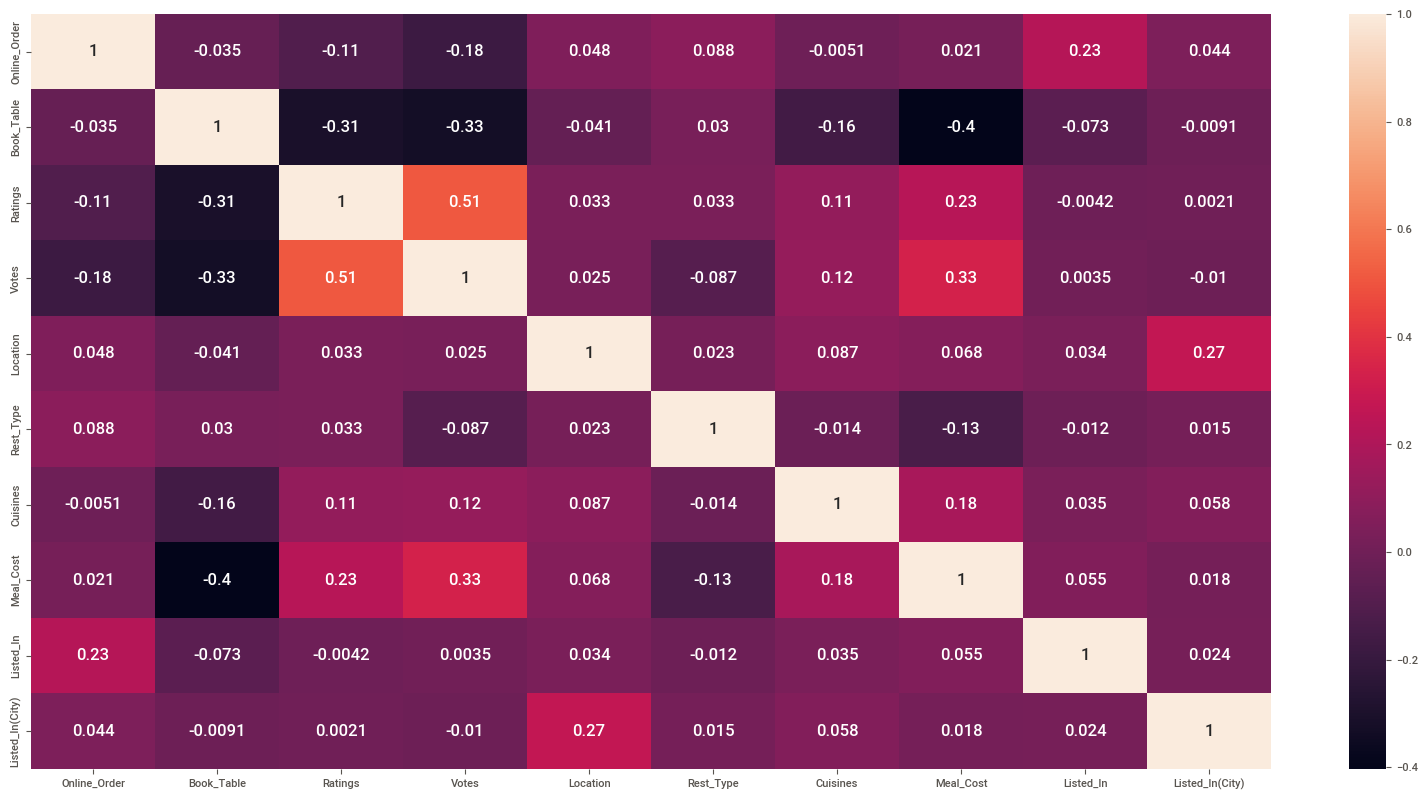

In [58]:
#Displays the correlation coefficient value on a heat map

correlation=labelled_zomato.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)
labelled_zomato.columns

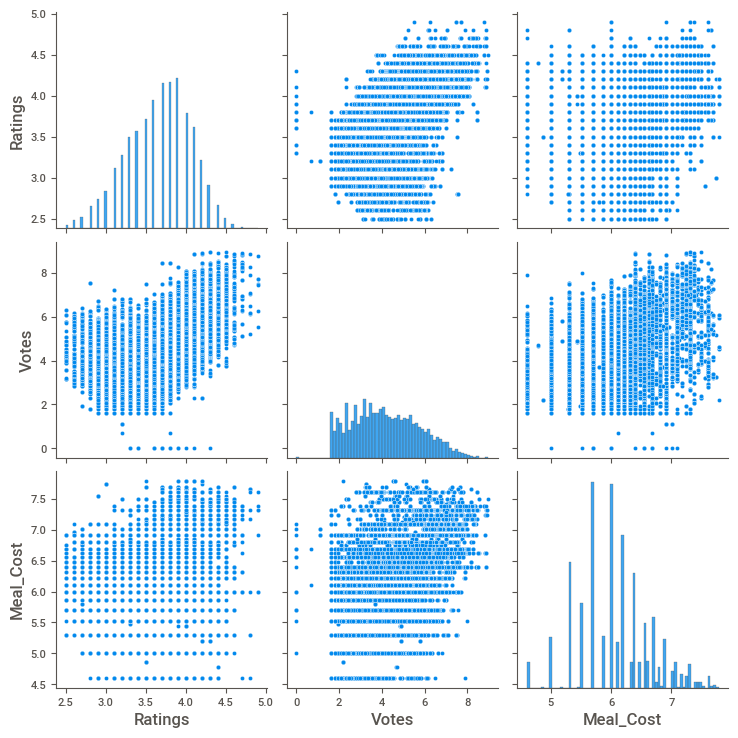

In [59]:
#Pair plot to check linearity between the numerical variables

sns.pairplot(zomato_bangalore)

## SelectKBest technique

In [60]:
#Seperating the target variable from independent variables

independent=labelled_zomato.iloc[:,[0,1,3,4,5,6,7,8,9]]
dependent=labelled_zomato['Ratings']

In [61]:
#Using feature selection technique to know the importace of each variable
#SelectKBest technique is used
#K values is the number of independent variables -1

test=SelectKBest(score_func=f_regression,k=8)
fit=test.fit(independent,dependent)

best=pd.DataFrame(columns=['Scores','P-value'],index=independent.columns)
scores=fit.scores_
pvalue=fit.pvalues_
best['Scores']=scores.round(2)
best['P-value']=pvalue.round(3)
best

,Scores,P-value
Online_Order,459.45,0.000
Book_Table,5204.48,0.000
Votes,22165.05,0.000
Location,30.85,0.000
Rest_Type,502.23,0.000
Cuisines,745.91,0.000
Meal_Cost,3443.58,0.000
Listed_In,0.16,0.689
Listed_In(City),0.01,0.922


In [62]:
#The Variables Listed_In and Listed_In(City) have almost zero F-Score
#These variables have P-value more than 0.05 which means they are insignificant
#So these variables are dropped as addition of these variables would drop the accuracy

x=labelled_zomato.iloc[:,[0,1,3,4,5,6,7]]
y=labelled_zomato['Ratings']

# STANDARDISATION

In [63]:
#Since the variables are in a different scale, so its better to put all the variable under one scale
#Standard Scaler technique is used

standardise=StandardScaler()

#Since Standardisation is done before data split we used fit_transform function

stand=standardise.fit_transform(x)

In [64]:
x=pd.DataFrame(stand,columns=x.columns)
x.head()

,Online_Order,Book_Table,Votes,Location,Rest_Type,Cuisines,Meal_Cost
0,-0.701750,-2.796708,1.575800,-1.427164,-0.648346,-0.845446,0.954241
1,-0.701750,0.357563,1.585602,-1.427164,-0.648346,-0.843575,0.954241
2,-0.701750,0.357563,1.683828,-1.427164,-0.557688,-0.841703,0.954241
3,1.425008,0.357563,0.192660,-1.427164,-0.467030,-0.839831,-0.649247
4,1.425008,0.357563,0.594638,-1.378306,-0.648346,-0.837959,0.483930


# DATA SPLITTING 

In [65]:
#Splitting the dataset with 70% for train and 30% for test

x_train_zomato,x_test_zomato,y_train_zomato,y_test_zomato=train_test_split(x,y,test_size=.30,random_state=619)

In [66]:
#Check the dimension of training dataframe

x_train_zomato.shape,y_train_zomato.shape

((25472, 7), (25472,))

# MODEL TRAINING

In [67]:
#Cross validation technique is used
#Lets work with 10 models with seed as 10

n=10
seed=10
kfold=KFold(n_splits=n)

In [68]:
#Function to train the model and to predict the ratings of the restaurant

def comparision(a,b,x_train, x_test, y_train, y_test):

#Models declearation

    model_name=['Linear Regression','Decision Tree','Random Forest','Extra Tree Regressor','XG Boost','ADA Boost']
    linear_model=LinearRegression()
    decision_model=DecisionTreeRegressor()
    random_model=RandomForestRegressor()
    extra_model=ExtraTreesRegressor()
    xgb_model=XGBRegressor()
    adb_model = AdaBoostRegressor()

#Creating dataframe to store the results

    compairision_metrics=pd.DataFrame(columns=['ACCURACY','MAE','RMSE','R-SQUARED','EXECUTION TIME'],index=model_name)
    
    for i, model in enumerate([linear_model,decision_model,random_model,extra_model,xgb_model,adb_model]):
        start_time=time.time()

#Training the models

        model.fit(x_train,y_train)
    
#Predicting the ratings of the restaurant

        y_prediction=model.predict(x_test)
        
#Metrics to compare the models

        accuracy=cross_val_score(model,a,b,cv=kfold).mean()*100
        mae=mean_absolute_error(y_test,y_prediction)
        rmse=sqrt(mean_squared_error(y_test,y_prediction))
        r_squared=metrics.r2_score(y_test,y_prediction)
        end_time=time.time()
        execution_time=end_time-start_time
        
        
        model=model_name[i]
        compairision_metrics.loc[model, :]=[accuracy,mae,rmse,r_squared,execution_time]
           
    return compairision_metrics

In [69]:
#Model Comparision for zomato bangalore dataset

Best_Featured_Model=comparision(x,y,x_train_zomato, x_test_zomato, y_train_zomato, y_test_zomato)
Best_Featured_Model

,ACCURACY,MAE,RMSE,R-SQUARED,EXECUTION TIME
Linear Regression,39.167976,0.223702,0.309114,0.400525,0.125382
Decision Tree,74.744532,0.047106,0.159635,0.840121,1.004199
Random Forest,86.238065,0.059675,0.128272,0.896771,64.120739
Extra Tree Regressor,87.404482,0.039422,0.117024,0.914082,35.175308
XG Boost,68.663633,0.146113,0.209123,0.725629,7.926048
ADA Boost,22.463649,0.278749,0.343583,0.259376,8.726952


Text(0.5, 0, 'TIME(sec)')

<Figure size 2000x1000 with 0 Axes>

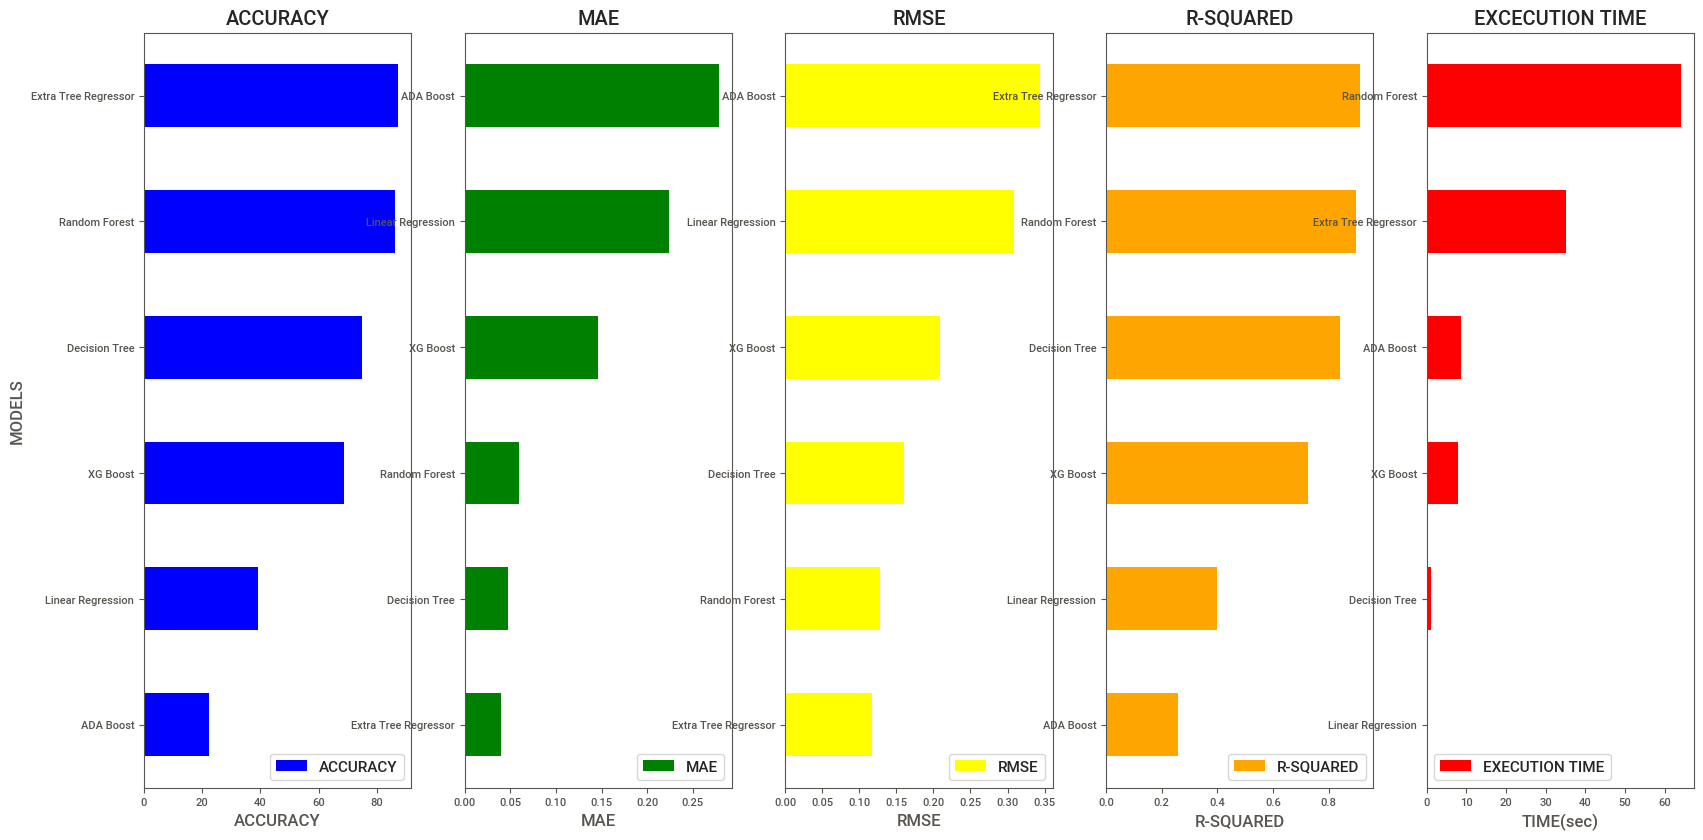

In [70]:
#Plot that shows all the values of the dataframe

plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))

#Subplot that shows accuracy of the models

axis=plt.subplot(1,5,1)
Best_Featured_Model.sort_values('ACCURACY',ascending=True).plot.barh(y='ACCURACY',color='blue',ax=axis)
plt.title('ACCURACY')
plt.xlabel('ACCURACY')
plt.ylabel('MODELS')

#Subplot that shows Mean Absolute Error of the models

axis=plt.subplot(1,5,2)
Best_Featured_Model.sort_values('MAE',ascending=True).plot.barh(y='MAE',color='green',ax=axis)
plt.title('MAE')
plt.xlabel('MAE')

#Subplot that shows Root Mean Square Error of the models

axis=plt.subplot(1,5,3)
Best_Featured_Model.sort_values('RMSE',ascending=True).plot.barh(y='RMSE',color='yellow',ax=axis)
plt.title('RMSE')
plt.xlabel('RMSE')

#Subplot that shows R-Squared of the models

axis=plt.subplot(1,5,4)
Best_Featured_Model.sort_values('R-SQUARED',ascending=True).plot.barh(y='R-SQUARED',color='orange',ax=axis)
plt.title('R-SQUARED')
plt.xlabel('R-SQUARED')

#Subplot that shows Execution Time of the models

axis=plt.subplot(1,5,5)
Best_Featured_Model.sort_values('EXECUTION TIME',ascending=True).plot.barh(y='EXECUTION TIME',color='red',ax=axis)
plt.title('EXCECUTION TIME')
plt.xlabel('TIME(sec)')

## Cross-Validation technique

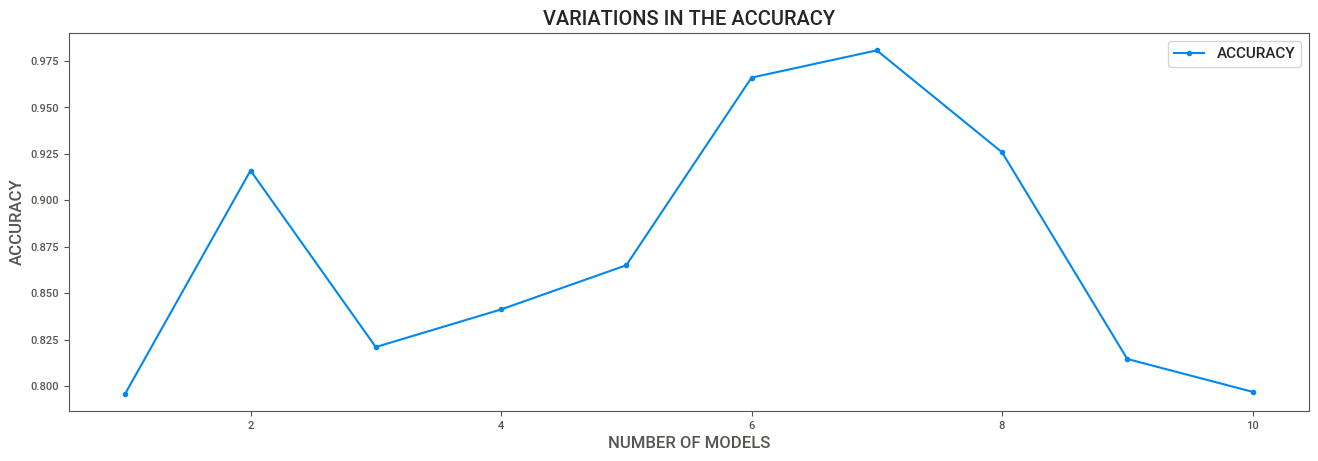

In [71]:
#Reason for choosing cross-validation technique
#The prediction is done using the best model
#Overfitting of the model can be reduced by taking average of the accuracy

Extra=ExtraTreesRegressor(n_estimators=50)
Extra.fit(x_train_zomato,y_train_zomato)
accuracy=cross_val_score(Extra,x,y,cv=kfold)
pyplot.plot([1,2,3,4,5,6,7,8,9,10],accuracy, '-o', label='ACCURACY')
pyplot.title('VARIATIONS IN THE ACCURACY',fontweight='bold')
pyplot.xlabel('NUMBER OF MODELS')
pyplot.ylabel('ACCURACY')
pyplot.legend()
pyplot.show()

## Comparing the Predicted Value with Test Value on Density Plot

In [72]:
#Prediction of ratings using Extra Tree Regressor which is the best model

Extra.fit(x_train_zomato,y_train_zomato)
y_prediction=Extra.predict(x_test_zomato)

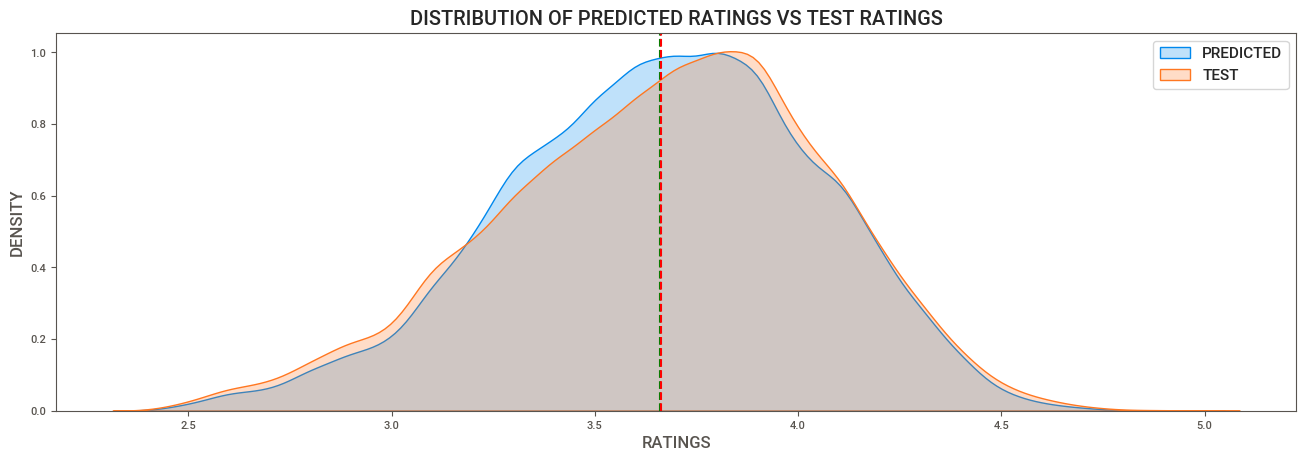

In [73]:
#Density plot that shows the comparision of Predicted Value and Test Value

sns.kdeplot(y_prediction,label='PREDICTED',shade=True )
sns.kdeplot(y_test_zomato,label='TEST',shade=True )
mean1=statistics.mean(y_prediction)
mean2=statistics.mean(y_test_zomato)
plt.axvline(mean1,color='green',linestyle='dashed')
plt.axvline(mean2,color='red',linestyle='dashed')
plt.xlabel('RATINGS')
plt.ylabel('DENSITY')
plt.title('DISTRIBUTION OF PREDICTED RATINGS VS TEST RATINGS')
plt.legend()

## Hyper-Parameter Tunning

In [74]:
#Pre-defined best model parameters to choose the best accuracy

random_best_parameters={'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 200, num = 2)],
               'max_features': ['auto','sqrt','log2'],
               'max_depth': [100,200,300],
               'min_samples_split': [1,2,3,4],
               'min_samples_leaf': [1,2,3,4]}
print(random_best_parameters)

#Pre-defined worst model parameters to choose the worst accuracy

random_worst_parameters={'n_estimators': [2,4,5,7,10],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [1,2,3,4],
               'min_samples_split': [int(x) for x in np.linspace(start = 1, stop = 20, num = 2)],
               'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 20, num = 2)]}
print(random_worst_parameters)

{'n_estimators': [1, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 200, 300], 'min_samples_split': [1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4]}
{'n_estimators': [2, 4, 5, 7, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, 4], 'min_samples_split': [1, 20], 'min_samples_leaf': [1, 20]}


In [75]:
#This function is created for hyper-parameter tunning by choosing Random Tree and Extra Tree Regressor as they are the best models

def hyperparameter(a,b,x_train, x_test, y_train, y_test):
    model_name=['Random Forest Best','Extra Tree Best','Random Forest Worst','Extra Tree Worst']

    random_best=RandomForestRegressor()
    random_randomcv_best=RandomizedSearchCV(estimator=random_best,param_distributions=random_best_parameters,n_iter=3,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
    
    extra_best=ExtraTreesRegressor()
    extra_randomcv_best=RandomizedSearchCV(estimator=extra_best,param_distributions=random_best_parameters,n_iter=3,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

    random_worst=RandomForestRegressor()
    random_randomcv_worst=RandomizedSearchCV(estimator=random_worst,param_distributions=random_worst_parameters,n_iter=3,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
    
    extra_worst=ExtraTreesRegressor()
    extra_randomcv_worst=RandomizedSearchCV(estimator=extra_worst,param_distributions=random_worst_parameters,n_iter=3,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

    hyper=pd.DataFrame(columns=['ACCURACY','EXECUTION TIME','MAE','RMSE'],index=model_name)
    
    for i, model in enumerate([random_randomcv_best,extra_randomcv_best,random_randomcv_worst,extra_randomcv_worst]):
        start_time=time.time()
        model.fit(x_train,y_train)
        y_prediction=model.predict(x_test)
        
        accuracy=cross_val_score(model,a,b,cv=kfold).mean()*100
        mae=mean_squared_error(y_test,y_prediction)
        rmse=sqrt(mean_squared_error(y_test,y_prediction))
        end_time=time.time()
        execution_time=end_time-start_time
        
        model=model_name[i]
        hyper.loc[model, :]=[accuracy,execution_time,mae,rmse]

#Prints the best parameters that is chosen from random_parameters
                                       
    print('Random Forest Best Parameters',random_randomcv_best.best_params_)
    print('Extra Tree Best Parameters',extra_randomcv_best.best_params_)
                                       
#Prints the worst parameters that is chosen from random_parameters  
                                       
    print('Random Forest Worst Parameters',random_randomcv_worst.best_params_)
    print('Extra Tree Worst Parameters',extra_randomcv_worst.best_params_)
        
    return hyper

In [76]:
tunning=hyperparameter(x,y,x_train_zomato, x_test_zomato, y_train_zomato, y_test_zomato)
tunning

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fi

,ACCURACY,EXECUTION TIME,MAE,RMSE
Random Forest Best,85.859834,233.342838,0.017391,0.131874
Extra Tree Best,87.239825,130.940149,0.014289,0.119536
Random Forest Worst,35.0482,2.924006,0.100617,0.317202
Extra Tree Worst,24.481364,2.292274,0.127558,0.357152


# ZOMATO INTERNATIONAL DATASET

## Dataset Uploadation

In [77]:
#Uploading Zomato dataset that contains international restaurants

zomato_international=pd.read_csv("zomato india.csv",encoding = 'latin-1')

In [78]:
#Verifing the dataframe

zomato_international.head()

,Country_Code,City,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Votes,Average Cost for two,Rating,Cuisines_Count
0,162,Makati City,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,3,314,1100,4.8,3
1,162,Makati City,Japanese,Botswana Pula(P),Yes,No,3,591,1200,4.5,1
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,4,270,4000,4.4,4
3,162,Mandaluyong City,"Japanese, Sushi",Botswana Pula(P),No,No,4,365,1500,4.9,2
4,162,Mandaluyong City,"Japanese, Korean",Botswana Pula(P),Yes,No,4,229,1500,4.8,2


In [79]:
zomato_international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country_Code          9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Cuisines              9542 non-null   object 
 3   Currency              9551 non-null   object 
 4   Has Table booking     9551 non-null   object 
 5   Has Online delivery   9551 non-null   object 
 6   Price range           9551 non-null   int64  
 7   Votes                 9551 non-null   int64  
 8   Average Cost for two  9551 non-null   int64  
 9   Rating                9551 non-null   float64
 10  Cuisines_Count        9551 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 820.9+ KB


In [80]:
#Dropping unecessary variables

zomato_international=zomato_international.drop(['Country_Code'],axis=1)

In [81]:
#Renaming columns for better understanding

zomato_international=zomato_international.rename(columns = { 'Has Table booking':'Has_Table_booking','Has Online delivery': 'Has_Online_delivery','Price range':'Price_Range', 'Average Cost for two':'Cost'},inplace=False)

In [82]:
#Checking the skewness and kurtosis of numerical variables

zomato_international.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Price_Range,0.889618,-0.142550
Votes,8.807637,128.225969
Cost,35.477915,1495.777394
Rating,-0.677423,-0.762189
Cuisines_Count,1.323447,2.710530


In [83]:
#Tranforming Votes variable that was skewed using log function

zomato_international['Votes'] = np.log(zomato_international.Votes+1)

In [84]:
#Tranforming Cost variable that was highly skewed using log function

zomato_international['Cost'] = np.log(zomato_international.Cost+1)

In [85]:
#Tranforming Cuisines_Count variable that was skewed using log function

zomato_international['Cuisines_Count'] = np.log(zomato_international.Cuisines_Count+1)

In [86]:
#Saving index value of outliers

ind1=[]
for feature in ['Price_Range','Votes','Cost','Rating','Cuisines_Count']:
    ind1.extend(outliers(zomato_international,feature))

In [87]:
#Dropping outliers

zom=remove(zomato_international,ind1)

In [88]:
zomato_international=zom.copy()

In [89]:
zomato_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 8370 non-null   object 
 1   Cuisines             8370 non-null   object 
 2   Currency             8370 non-null   object 
 3   Has_Table_booking    8370 non-null   object 
 4   Has_Online_delivery  8370 non-null   object 
 5   Price_Range          8370 non-null   int64  
 6   Votes                8370 non-null   float64
 7   Cost                 8370 non-null   float64
 8   Rating               8370 non-null   float64
 9   Cuisines_Count       8370 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 719.3+ KB


## Label Encoding

In [90]:
#Label encoding for categorical variables

def labelencode(data):
    for column in data.columns[~data.columns.isin(['Cuisines_Count', 'Rating', 'Cost','Votes','Price_Range'])]:
        data[column]=data[column].factorize()[0]
    return data

labelencode_zomato=labelencode(zomato_international.copy())

In [91]:
labelencode_zomato

,City,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Price_Range,Votes,Cost,Rating,Cuisines_Count
0,0,0,0,0,0,3,5.752573,7.003974,4.8,1.386294
1,0,1,0,0,0,3,6.383507,7.090910,4.5,0.693147
5,1,2,0,1,0,3,5.820083,6.908755,4.4,0.693147
9,2,3,0,0,0,3,6.278521,7.003974,4.8,0.693147
10,2,4,0,1,0,3,6.976348,6.685861,4.9,1.098612
...,...,...,...,...,...,...,...,...,...,...
9542,68,1345,9,1,0,3,6.228511,4.394449,3.7,0.693147
9545,68,1346,9,1,0,3,6.769642,4.510860,4.3,1.098612
9546,68,613,9,1,0,3,6.670766,4.394449,4.1,0.693147
9547,68,1347,9,1,0,3,6.942157,4.663439,4.2,1.386294


## Feature Selection

Index(['City', 'Cuisines', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_Range', 'Votes', 'Cost', 'Rating',
       'Cuisines_Count'],
      dtype='object')

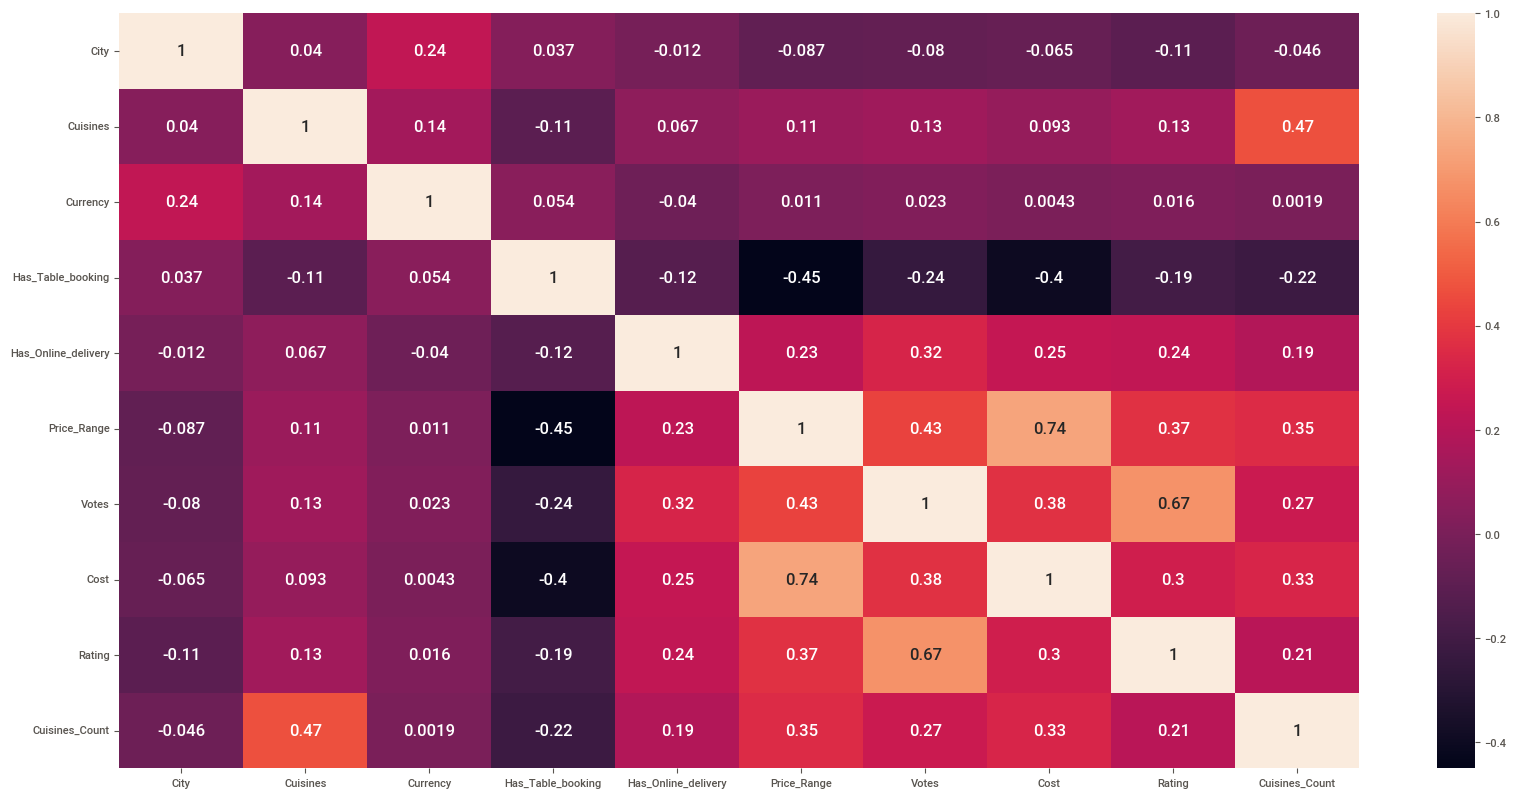

In [92]:
#Heat map that shows the correlation of the variables

correlation1=labelencode_zomato.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(correlation1, annot=True)
labelencode_zomato.columns

In [93]:
#Price_range is removed for feature selection as it is highly correlated with cost variable

independent1=labelencode_zomato.iloc[:,[0,1,2,3,4,6,7,9]]
dependent1=labelencode_zomato['Rating']

In [94]:
#Using feature selection technique to know the importace of each variable
#SelectKBest technique is used

test1=SelectKBest(score_func=f_regression,k=8)
fit1=test1.fit(independent1,dependent1)

features=pd.DataFrame(columns=['Scores','P-value'],index=independent1.columns)
scores1=fit1.scores_
pvalue1=fit1.pvalues_
features['Scores']=scores1.round(2)
features['P-value']=pvalue1.round(3)
features

,Scores,P-value
City,112.68,0.0
Cuisines,256.00,0.0
Currency,34.98,0.0
Has_Table_booking,391.44,0.0
Has_Online_delivery,809.58,0.0
Votes,22932.26,0.0
Cost,1401.75,0.0
Cuisines_Count,703.56,0.0


In [95]:
x1=labelencode_zomato.iloc[:,[0,1,2,3,4,6,7,9]]
y1=labelencode_zomato['Rating']

## Standardisation

In [96]:
st1=standardise.fit_transform(x1)

In [97]:
x1=pd.DataFrame(st1,columns=x1.columns)
x1.head()

,City,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Votes,Cost,Cuisines_Count
0,-5.117215,-0.830631,-6.682913,-2.915573,-0.633302,1.338413,1.403599,1.004635
1,-5.117215,-0.827236,-6.682913,-2.915573,-0.633302,1.655790,1.533049,-1.121131
2,-4.994101,-0.823840,-6.682913,0.342986,-0.633302,1.372372,1.261814,-1.121131
3,-4.870987,-0.820444,-6.682913,-2.915573,-0.633302,1.602979,1.403599,-1.121131
4,-4.870987,-0.817049,-6.682913,0.342986,-0.633302,1.954005,0.929918,0.122363


## Model Building

In [98]:
#Splitting the dataset with 70% for train and 30% for test

x_train_international,x_test_international,y_train_international,y_test_international=train_test_split(x1,y1,test_size=.30,random_state=619)

In [99]:
#Model comparision for zomato international dataset

Best_Featured_Model1=comparision(x1,y1,x_train_international, x_test_international, y_train_international, y_test_international)
Best_Featured_Model1

,ACCURACY,MAE,RMSE,R-SQUARED,EXECUTION TIME
Linear Regression,70.306319,0.479673,0.567021,0.734546,0.043881
Decision Tree,80.180898,0.283028,0.445463,0.836162,0.387754
Random Forest,89.511847,0.210581,0.328301,0.911011,12.922262
Extra Tree Regressor,89.01124,0.217919,0.340762,0.904128,9.674235
XG Boost,89.404507,0.208665,0.319624,0.915653,1.975651
ADA Boost,87.828885,0.240744,0.363522,0.890893,1.366954


Text(0.5, 0, 'TIME(sec)')

<Figure size 2000x1000 with 0 Axes>

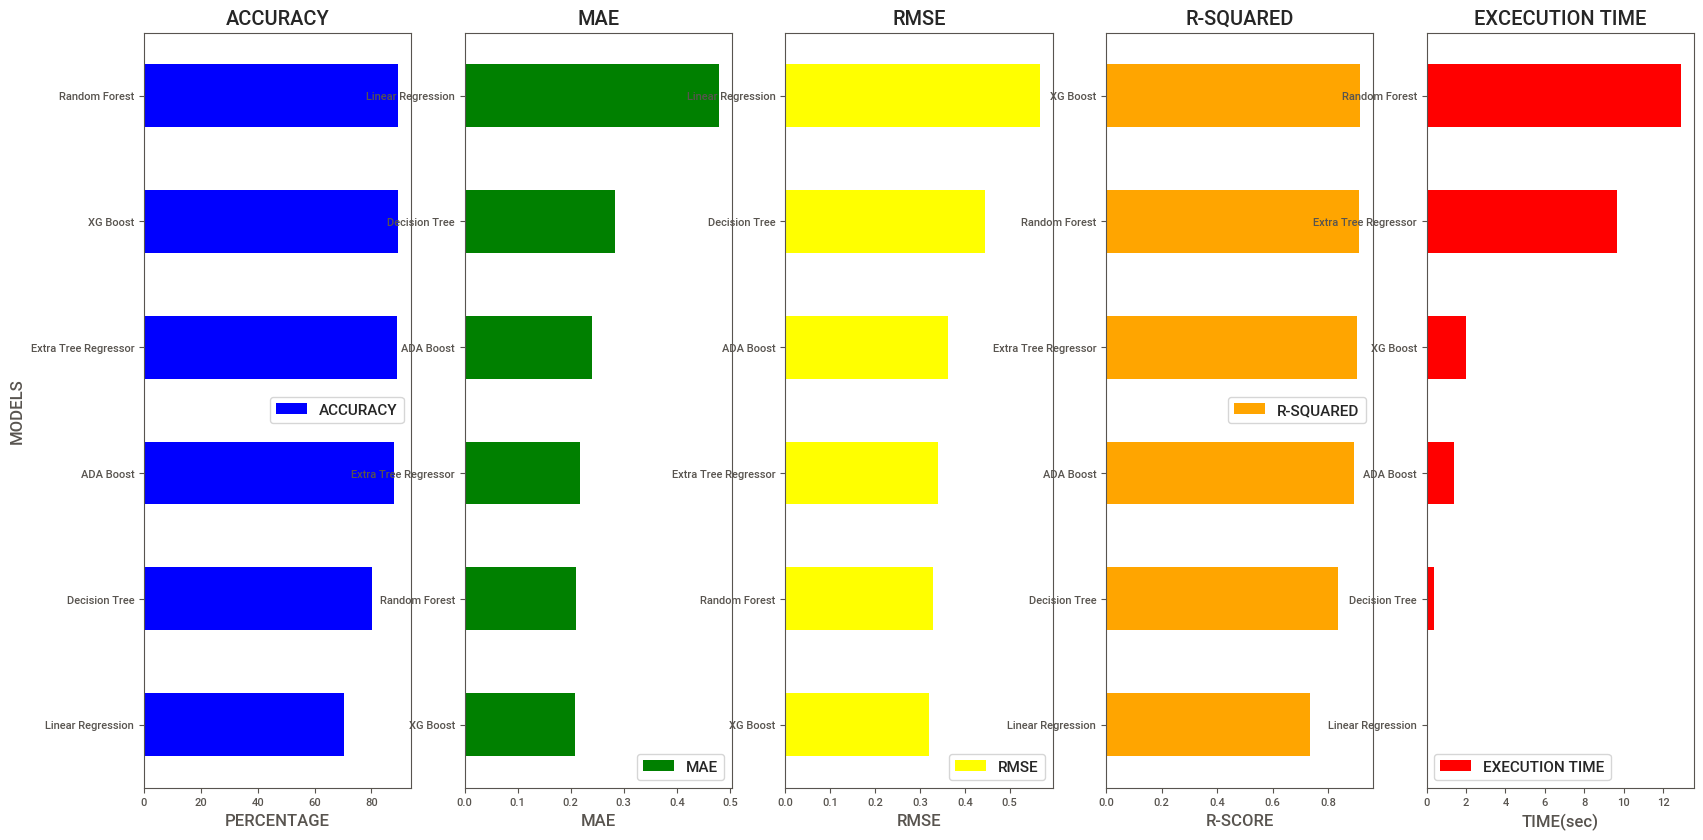

In [100]:
#Plot that shows all the values of the dataframe

plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))

#Subplot that shows accuracy of the models

axis=plt.subplot(1,5,1)
Best_Featured_Model1.sort_values('ACCURACY',ascending=True).plot.barh(y='ACCURACY',color='blue',ax=axis)
plt.title('ACCURACY',fontweight='bold')
plt.ylabel('MODELS',fontweight='bold')
plt.xlabel('PERCENTAGE',fontweight='bold')

#Subplot that shows Mean Absolute Error of the models

axis=plt.subplot(1,5,2)
Best_Featured_Model1.sort_values('MAE',ascending=True).plot.barh(y='MAE',color='green',ax=axis)
plt.title('MAE',fontweight='bold')
plt.xlabel('MAE')

#Subplot that shows Root Mean Square Error of the models

axis=plt.subplot(1,5,3)
Best_Featured_Model1.sort_values('RMSE',ascending=True).plot.barh(y='RMSE',color='yellow',ax=axis)
plt.title('RMSE',fontweight='bold')
plt.xlabel('RMSE')

#Subplot that shows R-Squared of the models

axis=plt.subplot(1,5,4)
Best_Featured_Model1.sort_values('R-SQUARED',ascending=True).plot.barh(y='R-SQUARED',color='orange',ax=axis)
plt.title('R-SQUARED',fontweight='bold')
plt.xlabel('R-SCORE')

#Subplot that shows Execution Time of the models

axis=plt.subplot(1,5,5)
Best_Featured_Model1.sort_values('EXECUTION TIME',ascending=True).plot.barh(y='EXECUTION TIME',color='red',ax=axis)
plt.title('EXCECUTION TIME',fontweight='bold')
plt.xlabel('TIME(sec)')